**Bagging on Internet Advertisment dataset**

Specify path and read dataset

In [1]:
import pandas as pd
# Specify data path to your directory
dataPath='/content/drive/My Drive/Sem8/DS/ASS/Ass5/dataset/dataset.csv'
#Reading the data
data = pd.read_csv(dataPath,index_col=0)
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.


In [2]:
import numpy as np
#Replacing ? with NaN
data=data.applymap(lambda i: np.nan if str(i).strip() == '?' else i)
#Dropping the NaN values
data=data.dropna()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,30,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,nonad.
3274,170,94,0.5529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.


Labels separated

In [3]:
# y=data[data.columns[-1]] #same thing
y=data.iloc[:,-1]
print(y.head())

0    ad.
1    ad.
2    ad.
3    ad.
4    ad.
Name: 1558, dtype: object


Label encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
#Converting labels to numeric data
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

Labels dropped from dataset

In [5]:
X=data.drop(data.columns[-1],axis=1)
print(X.head())

     0    1       2  3  4  5  6  ...  1551  1552  1553  1554  1555  1556  1557
0  125  125       1  1  0  0  0  ...     0     0     0     0     0     0     0
1   57  468  8.2105  1  0  0  0  ...     0     0     0     0     0     0     0
2   33  230  6.9696  1  0  0  0  ...     0     0     0     0     0     0     0
3   60  468     7.8  1  0  0  0  ...     0     0     0     0     0     0     0
4   60  468     7.8  1  0  0  0  ...     0     0     0     0     0     0     0

[5 rows x 1558 columns]


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 0 to 3278
Columns: 1558 entries, 0 to 1557
dtypes: int64(1554), object(4)
memory usage: 28.1+ MB


In [7]:
X.describe()

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,...,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,2359.000000,2359.0,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.0,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.0,2359.000000,2359.000000,2359.000000,2359.000000,2359.0,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,...,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.00000,2359.000000,2359.000000,2359.000000,2359.000000,2359.0,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.00000,2359.000000
mean,0.002120,0.0,0.006359,0.004663,0.004663,0.014837,0.004663,0.006783,0.012293,0.0,0.006783,0.004663,0.004239,0.005087,0.006359,0.002967,0.004239,0.006359,0.005511,0.005935,0.005087,0.003391,0.000848,0.008478,0.004663,0.000424,0.005087,0.005087,0.005935,0.0,0.023739,0.005511,0.004239,0.004663,0.0,0.005511,0.004663,0.005511,0.011869,0.007630,...,0.020772,0.004239,0.007630,0.005935,0.022043,0.006783,0.008054,0.008054,0.011022,0.014413,0.004239,0.017804,0.005935,0.006783,0.033489,0.012293,0.002543,0.006783,0.005935,0.018652,0.00975,0.006783,0.002120,0.013565,0.011022,0.0,0.005511,0.000848,0.004239,0.003815,0.001696,0.003815,0.001272,0.002120,0.002543,0.008478,0.013989,0.014837,0.00975,0.000848
std,0.045999,0.0,0.079504,0.068141,0.068141,0.120925,0.068141,0.082094,0.110215,0.0,0.082094,0.068141,0.064984,0.071156,0.079504,0.054404,0.064984,0.079504,0.074046,0.076824,0.071156,0.058148,0.029111,0.091705,0.068141,0.020589,0.071156,0.071156,0.076824,0.0,0.152267,0.074046,0.064984,0.068141,0.0,0.074046,0.068141,0.074046,0.108321,0.087036,...,0.142649,0.064984,0.087036,0.076824,0.146855,0.082094,0.089402,0.089402,0.104426,0.119211,0.064984,0.132267,0.076824,0.082094,0.179947,0.110215,0.050379,0.082094,0.076824,0.135321,0.09828,0.082094,0.045999,0.115701,0.104426,0.0,0.074046,0.029111,0.064984,0.061662,0.041152,0.061662,0.035646,0.045999,0.050379,0.091705,0.117470,0.120925,0.09828,0.029111
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Normalizing data

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 1.11332804, -0.23524739, -0.48180809, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.12597621,  2.39895364,  0.71081076, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.5633777 ,  0.57114068,  0.50556553, ..., -0.12272017,
        -0.09922646, -0.02912965],
       ...,
       [ 0.67592654, -0.12004909, -0.41794703, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.74562833, -0.27364682,  0.21573459, ..., -0.12272017,
        -0.09922646, -0.02912965],
       [-0.43580227, -0.88803773, -0.48180809, ..., -0.12272017,
        -0.09922646, -0.02912965]])

Function to compare bag percent size with accuracy

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 

def Bagging( bagPercentSize):
    bag = BaggingClassifier(
                              base_estimator = DecisionTreeClassifier(), 
                              n_estimators = 10,                   
                              random_state = 0,                   
                              max_samples=(bagPercentSize/100.0)    
                            ) 
    
    # 10 Fold-cross validation
    accuracies = model_selection.cross_val_score( bag, X, y, cv = model_selection.KFold(n_splits = 10)) 
    return accuracies.mean() 

In [10]:
accuracies = []
for bagPercentSize in range(10,101,10):
    accuracy = Bagging(bagPercentSize)
    print ("Bag Size: ", bagPercentSize,"\tAccuracy: ", accuracy)    
    accuracies.append([bagPercentSize, accuracy])

Bag Size:  10 	Accuracy:  0.9351658853227551
Bag Size:  20 	Accuracy:  0.9427912008654887
Bag Size:  30 	Accuracy:  0.9453335737468447
Bag Size:  40 	Accuracy:  0.9449080418319509
Bag Size:  50 	Accuracy:  0.9432113234763794
Bag Size:  60 	Accuracy:  0.9449062387306167
Bag Size:  70 	Accuracy:  0.9372791200865489
Bag Size:  80 	Accuracy:  0.9440587811034981
Bag Size:  90 	Accuracy:  0.9419401370357015
Bag Size:  100 	Accuracy:  0.9330400288496212


**Importance Of Bag percent size**
Bag percent size helps us to select the amount of samples in each bag which we want to use to train each estimator which in our case is decision tree.

Converting list to dataframe because it is easier to plot

In [11]:
import matplotlib.pyplot as plt
performanceMeasure = pd.DataFrame(accuracies)
performanceMeasure.columns = ['Bag Percent Size', 'Accuracy']
performanceMeasure

,Bag Percent Size,Accuracy
0,10,0.935166
1,20,0.942791
2,30,0.945334
3,40,0.944908
4,50,0.943211
5,60,0.944906
6,70,0.937279
7,80,0.944059
8,90,0.941940
9,100,0.933040


Plotting line plot to show the effect of bag percent size on accuracy

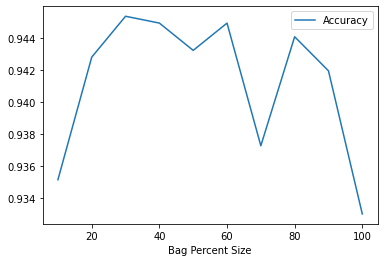

In [12]:
performanceMeasure.plot(kind='line',x='Bag Percent Size', y='Accuracy');

**References**<br>
https://machinelearningmastery.com/bagging-ensemble-with-python/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
https://scikit-learn.org/stable/modules/cross_validation.html
https://scikit-learn.org/stable/modules/tree.html
